In [35]:
import pyvista as pv
import numpy as np
from scipy.interpolate import make_interp_spline
pv.set_jupyter_backend('client')
from generate_noisy_pipe import *

# Noisy cylinder

In [36]:
# Define mesh path
case_path = '/home/dana/Documents/SimVascular/svMultiPhysics/NoisyPipe/NP_0000_sten/'
mesh_path = case_path + 'mesh/'
geom_path = case_path + 'geom/'

In [37]:
# Load geometry files
fluid = pv.read(geom_path + "fluid.vtp")
solid = pv.read(geom_path + "solid.vtp")
combined = pv.read(geom_path + "combined.vtp")

# Visualize
pl = pv.Plotter()
pl.add_mesh(combined, cmap='tab10')#,show_edges=True)
pl.show()
print('Fluid manifold?', fluid.is_manifold)
print('Solid manifold?', solid.is_manifold)

Widget(value='<iframe src="http://localhost:46119/index.html?ui=P_0x75c1c8a52c90_18&reconnect=auto" class="pyv…

Fluid manifold? True
Solid manifold? True


In [ ]:
# Load fluid
f_vol = pv.read(mesh_path + "fluid/mesh-complete.vtu")
f_inlet = pv.read(mesh_path + "fluid/mesh-surfaces/inlet.vtp")
f_outlet = pv.read(mesh_path + "fluid/mesh-surfaces/outlet.vtp")
f_interface = pv.read(mesh_path + "fluid/mesh-surfaces/interface.vtp")
f_vol_c = f_vol.clip(normal='y',origin=(0,0,0),invert=True)
f_inlet = f_inlet.clip(normal='y',origin=(0,0,0),invert=True)
f_outlet = f_outlet.clip(normal='y',origin=(0,0,0),invert=True)
f_interface = f_interface.clip(normal='y',origin=(0,0,0),invert=True)

# Load solid
s_vol = pv.read(mesh_path + "solid/mesh-complete.vtu")
s_inlet = pv.read(mesh_path + "solid/mesh-surfaces/inlet.vtp")
s_outlet = pv.read(mesh_path + "solid/mesh-surfaces/outlet.vtp")
s_interface = pv.read(mesh_path + "solid/mesh-surfaces/interface.vtp")
s_outside = pv.read(mesh_path + "solid/mesh-surfaces/outside.vtp")
s_vol_c = s_vol.clip(normal='y',origin=(0,0,0),invert=True)
s_inlet = s_inlet.clip(normal='y',origin=(0,0,0),invert=True)
s_outlet = s_outlet.clip(normal='y',origin=(0,0,0),invert=True)
s_interface = s_interface.clip(normal='y',origin=(0,0,0),invert=True)
s_outside = s_outside.clip(normal='y',origin=(0,0,0),invert=True)

# Some camera stuff
cam = [(0,10,0),(0,0,0),(0,0,1)]#[(13,3,3),(3,0,0),(0,0,1)]
cam2 = [(0,25,0),(0,0,0),(0,0,1)]

plotter1 = pv.Plotter(shape=(1,2),off_screen=True)
# Volume mesh
plotter1.subplot(0,0)
plotter1.camera_position = cam
plotter1.add_mesh(f_vol_c, color='cyan', edge_opacity=0.5, show_edges=True) # Fluid
plotter1.add_mesh(s_vol_c, color='magenta', edge_opacity=0.5, show_edges=True) # Solid
plotter1.add_text("Volume Mesh", font_size=12)
plotter1.add_axes()
# Surface meshes
plotter1.subplot(0,1)
plotter1.camera_position = cam
# Fluid
plotter1.add_mesh(f_inlet, color='cyan', opacity=0.5, edge_opacity=0.5, show_edges=True)
plotter1.add_mesh(f_outlet, color='magenta', opacity=0.5, edge_opacity=0.5, show_edges=True)
plotter1.add_mesh(f_interface, color='green', edge_opacity=0.5, show_edges=True)
# Solid
plotter1.add_mesh(s_inlet, color='cyan', edge_opacity=0.5, show_edges=True)
plotter1.add_mesh(s_outlet, color='magenta', edge_opacity=0.5, show_edges=True)
plotter1.add_mesh(s_outside, color='red', edge_opacity=0.5, show_edges=True)
plotter1.add_text("Surface Mesh", font_size=12)
plotter1.add_axes()
plotter1.show()
# plotter1.save_graphic('mesh.eps')

plotter2 = pv.Plotter(shape=(1,2))
# Whole geometries
plotter2.subplot(0,0)
plotter2.camera_position = cam2
plotter2.add_mesh(f_vol_c, color='cyan', opacity=0.5, show_edges=False) # Fluid
plotter2.add_mesh(s_vol_c, color='magenta', opacity=0.5, show_edges=False) # Solid
plotter2.add_axes()
plotter2.subplot(0,1)
plotter2.add_mesh(f_vol, color='cyan', opacity=0.5, show_edges=False) # Fluid
plotter2.add_mesh(s_vol, color='magenta', opacity=0.5, show_edges=False) # Solid
plotter2.add_axes()
plotter2.show()
# plotter2.save_graphic('geom.eps')

Widget(value='<iframe src="http://localhost:46119/index.html?ui=P_0x75c1f0caeb40_23&reconnect=auto" class="pyv…

Widget(value='<iframe src="http://localhost:46119/index.html?ui=P_0x75c1f0cae990_24&reconnect=auto" class="pyv…

In [39]:
f_vol

UnstructuredGrid (0x75c1cc9a8ee0)
  N Cells:    60649
  N Points:   13823
  X Bounds:   -5.000e+00, 5.000e+00
  Y Bounds:   -1.322e+00, 1.245e+00
  Z Bounds:   -1.201e+00, 1.218e+00
  N Arrays:   4

Approx. smallest cell length: 0.008771565309665108
Approx. dt for CFL=1: 8.771565309665108e-05


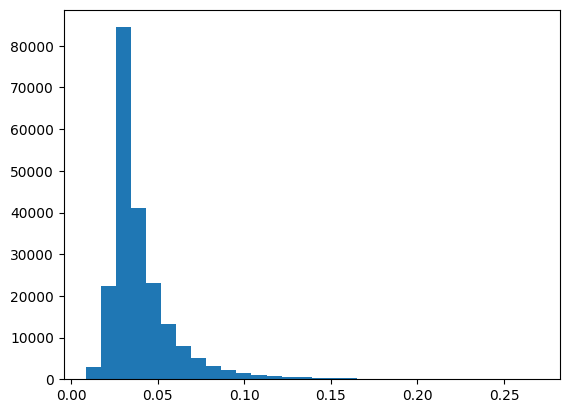

Approx. smallest cell length: 0.0016340268741621457
Approx. dt for CFL=1: 1.6340268741621458e-05


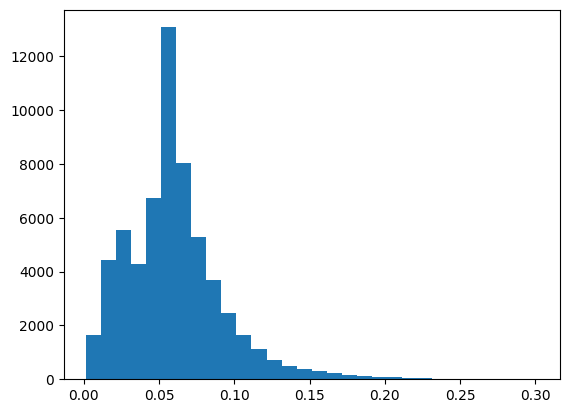

In [40]:
import matplotlib.pyplot as plt 
# plt.hist(f_vol.compute_cell_sizes())
f_vol = f_vol.compute_cell_sizes()
plt.hist(f_vol['Volume']**(1/3), bins=30)#, range=(0, 0.01))
delta_min = np.min(f_vol['Volume'])**(1/3)
print('Approx. smallest cell length: ' + str(delta_min))
print('Approx. dt for CFL=1: ' + str(delta_min/100.)) 